## 2.1 Import Libraries and Load the Dataset

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Load the dataset
df = pd.read_excel("/content/drive/MyDrive/Colab Notebooks/Fiverr/Ali Mansoor/E-commerce.xlsx")
df

,c,device_type,user_id,session_id,item_id,item_price,category,product_type,impression_time,app_code,os_version,is_4G,is_click
0,2018-10-18 14:27:00,android,87862,268465,44459,4602,11,3040,2018-11-15 00:00:00,422,old,0,0
1,2018-10-18 14:27:00,android,63410,268465,44459,3513,12,6822,2018-11-15 00:01:00,467,latest,1,1
2,2018-10-18 14:43:00,android,71748,268465,44459,825,17,1619,2018-11-15 00:02:00,259,intermediate,1,0
3,2018-10-18 14:46:00,android,69209,268465,44459,2355,13,5264,2018-11-15 00:02:00,244,latest,1,0
4,2018-10-18 14:46:00,android,62873,268465,44459,1267,17,10239,2018-11-15 00:02:00,473,latest,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020,2018-11-03 12:39:00,android,8146,284263,5754,2125,13,1762,2018-11-15 09:46:00,207,latest,1,0
2021,2018-11-03 12:39:00,android,43622,284263,28621,2874,10,9375,2018-11-15 09:46:00,207,latest,1,0
2022,2018-11-03 12:41:00,android,12923,284263,28621,6105,17,2637,2018-11-15 09:46:00,3,latest,1,0
2023,2018-10-20 22:59:00,android,26523,418685,36253,3444,7,2037,2018-11-15 09:47:00,207,latest,0,0


## 2.2 Perform Exploratory Data Analysis (EDA)

In [10]:
# Summary statistics
df.describe()

,c,user_id,session_id,item_id,item_price,category,product_type,impression_time,app_code,is_4G,is_click
count,2025,2025.000000,2.025000e+03,2025.000000,2025.000000,2025.000000,2025.000000,2025,2025.000000,2025.000000,2025.000000
mean,2018-10-25 00:26:42.666666496,46726.988642,5.474150e+05,63519.058765,6658.900247,10.293333,5358.944198,2018-11-15 07:19:29.511110912,244.722469,0.342222,0.049877
min,2018-10-15 09:48:00,10.000000,1.694000e+03,176.000000,16.000000,0.000000,6.000000,2018-11-15 00:00:00,1.000000,0.000000,0.000000
25%,2018-10-19 18:05:00,24853.000000,2.738070e+05,33864.000000,1465.000000,7.000000,2765.000000,2018-11-15 03:03:00,190.000000,0.000000,0.000000
50%,2018-10-23 21:29:00,46251.000000,5.440370e+05,62896.000000,2425.000000,11.000000,5353.000000,2018-11-15 07:56:00,207.000000,0.000000,0.000000
75%,2018-10-30 07:08:00,69412.000000,7.992640e+05,91322.000000,4793.000000,14.000000,8121.000000,2018-11-15 10:06:00,371.000000,1.000000,0.000000
max,2018-11-05 12:12:00,92508.000000,1.089219e+06,132865.000000,239360.000000,17.000000,10573.000000,2018-11-15 17:46:00,508.000000,1.000000,1.000000
std,NaN,26395.013481,3.107911e+05,36838.224091,17292.386770,4.963591,3075.499007,NaN,124.449722,0.474571,0.217744


In [ ]:
# Check data types and missing values
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2025 entries, 0 to 2024
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   c                2025 non-null   datetime64[ns]
 1   device_type      2025 non-null   object        
 2   user_id          2025 non-null   int64         
 3   session_id       2025 non-null   int64         
 4   item_id          2025 non-null   int64         
 5   item_price       2025 non-null   int64         
 6   category         2025 non-null   int64         
 7   product_type     2025 non-null   int64         
 8   impression_time  2025 non-null   datetime64[ns]
 9   app_code         2025 non-null   int64         
 10  os_version       2025 non-null   object        
 11  is_4G            2025 non-null   int64         
 12  is_click         2025 non-null   int64         
dtypes: datetime64[ns](2), int64(9), object(2)
memory usage: 205.8+ KB
None


Droping irrelevant columns

In [19]:
df.drop(columns=['c', 'impression_time','device_type'], inplace=True)
df.head()

,user_id,session_id,item_id,item_price,category,product_type,app_code,os_version,is_4G,is_click
0,87862,268465,44459,4602,11,3040,422,old,0,0
1,63410,268465,44459,3513,12,6822,467,latest,1,1
2,71748,268465,44459,825,17,1619,259,intermediate,1,0
3,69209,268465,44459,2355,13,5264,244,latest,1,0
4,62873,268465,44459,1267,17,10239,473,latest,0,0


Counts for each column

In [12]:
# Loop through each column
for column in df.columns:
    # Print column name
    print("Column:", column)

    # Print value counts
    print(df[column].value_counts())

    print("")

Column: user_id
user_id
87862    2
78046    2
39075    2
91768    2
70713    2
        ..
56678    1
49411    1
48678    1
25626    1
91568    1
Name: count, Length: 1842, dtype: int64

Column: session_id
session_id
978990     30
529008     22
692656     20
273807     20
495779     19
           ..
221805      1
769237      1
50602       1
335717      1
1059707     1
Name: count, Length: 718, dtype: int64

Column: item_id
item_id
425       19
54546     19
49461     18
61487     17
88587     13
          ..
106432     1
28729      1
126564     1
36823      1
49723      1
Name: count, Length: 976, dtype: int64

Column: item_price
item_price
2298     30
3450     24
633      19
2874     19
825      18
         ..
1431      1
2493      1
2478      1
32808     1
6105      1
Name: count, Length: 937, dtype: int64

Column: category
category
13    305
7     238
17    230
9     178
16    173
12    146
11    135
4     124
0     117
14     97
1      96
10     93
6      36
8      35
15     21
5    

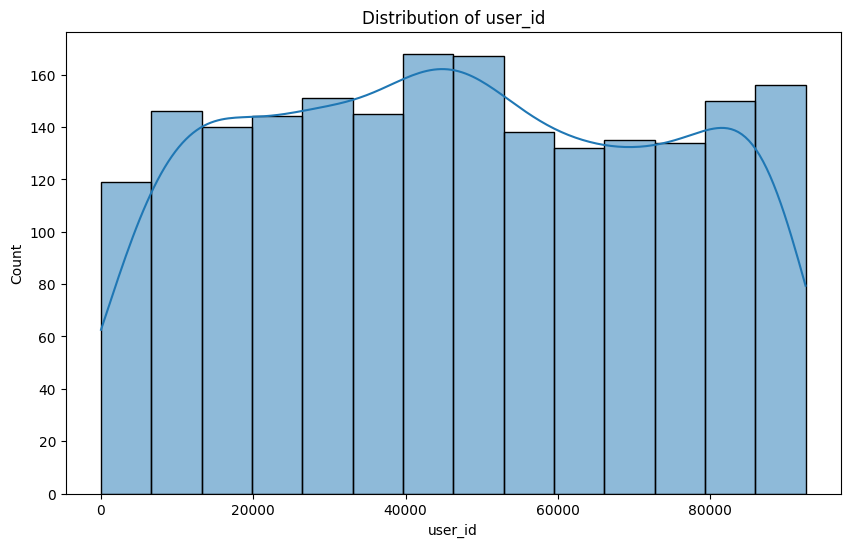

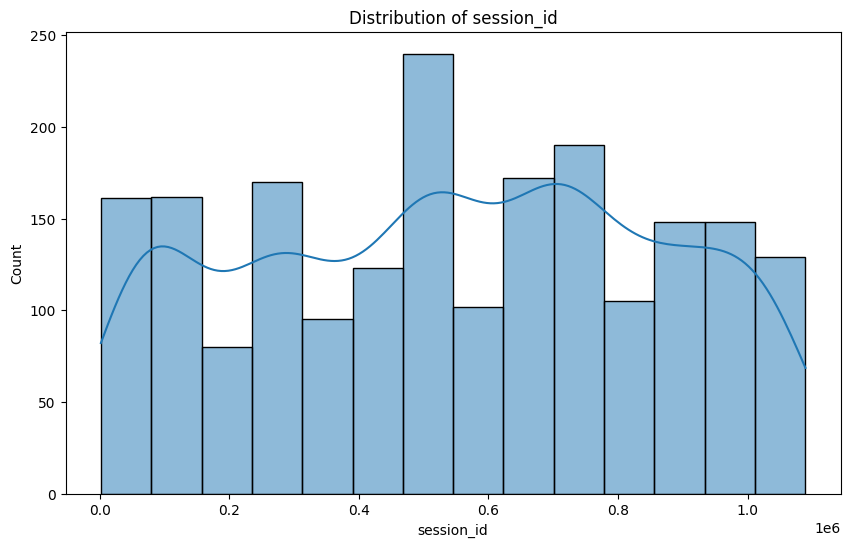

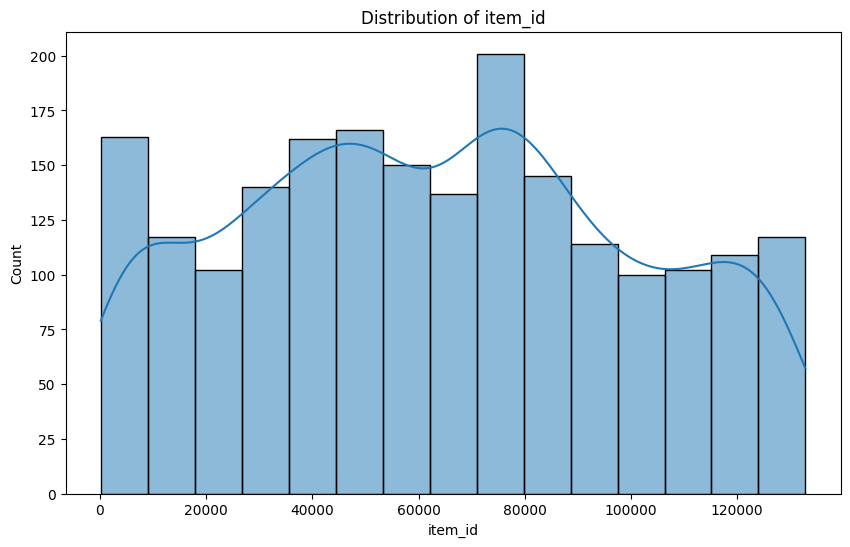

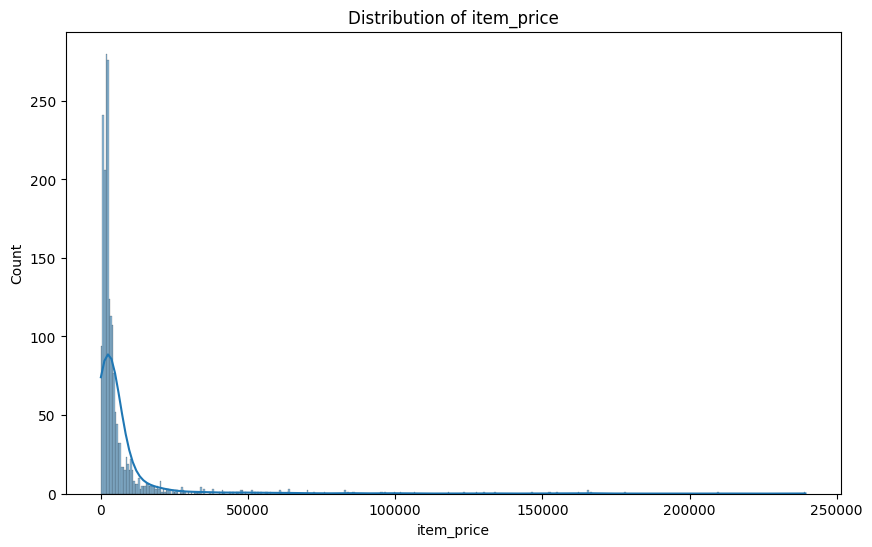

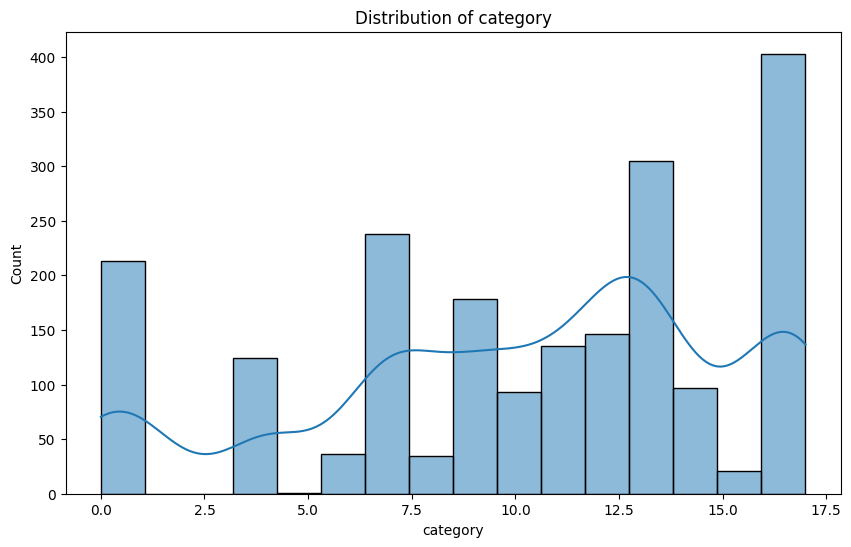

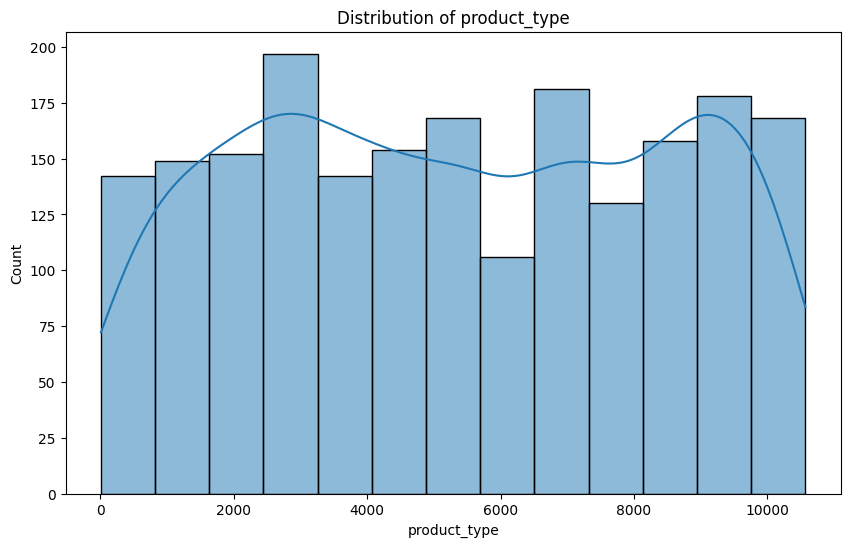

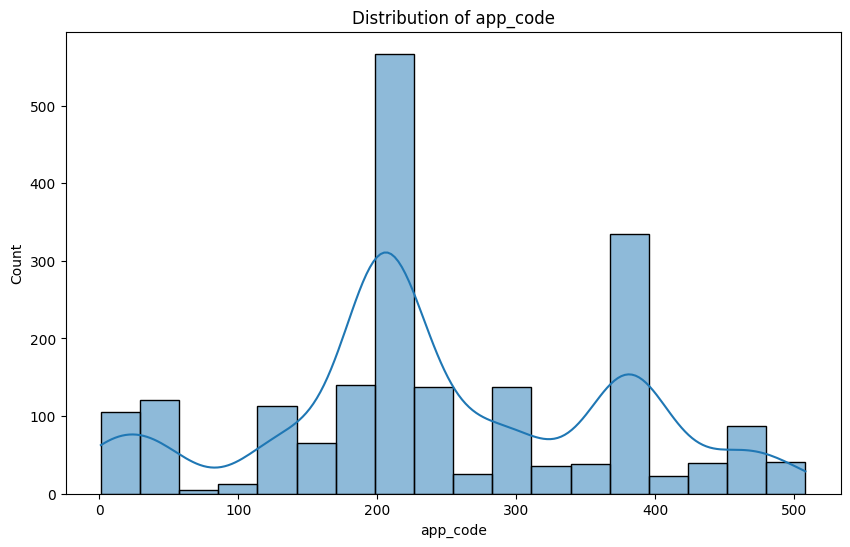

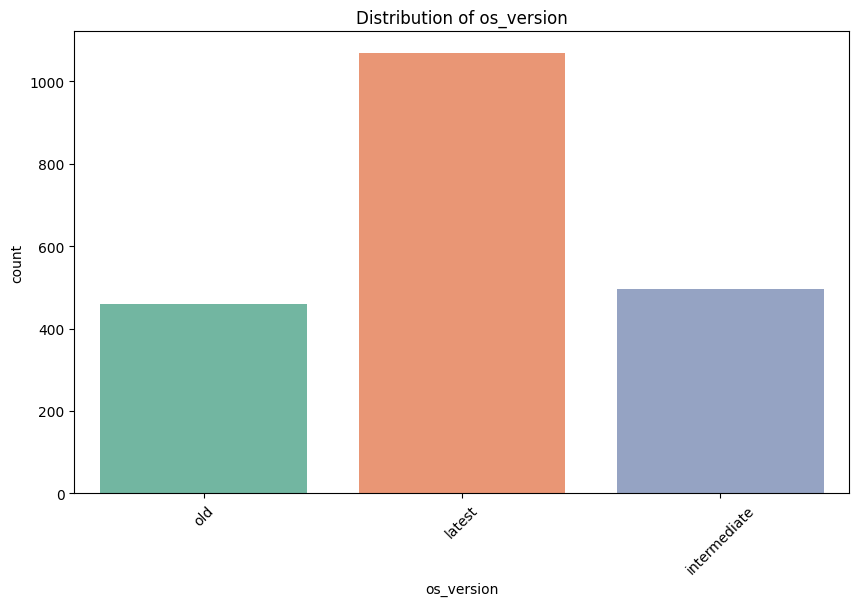

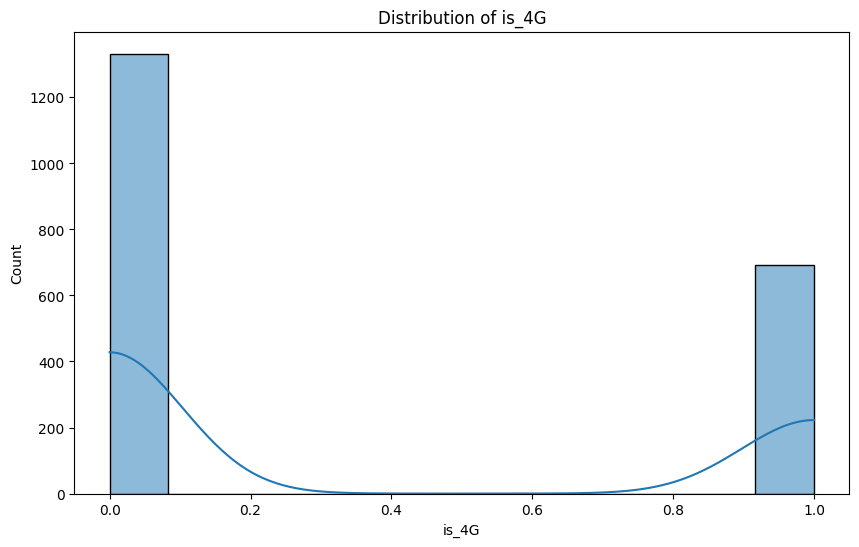

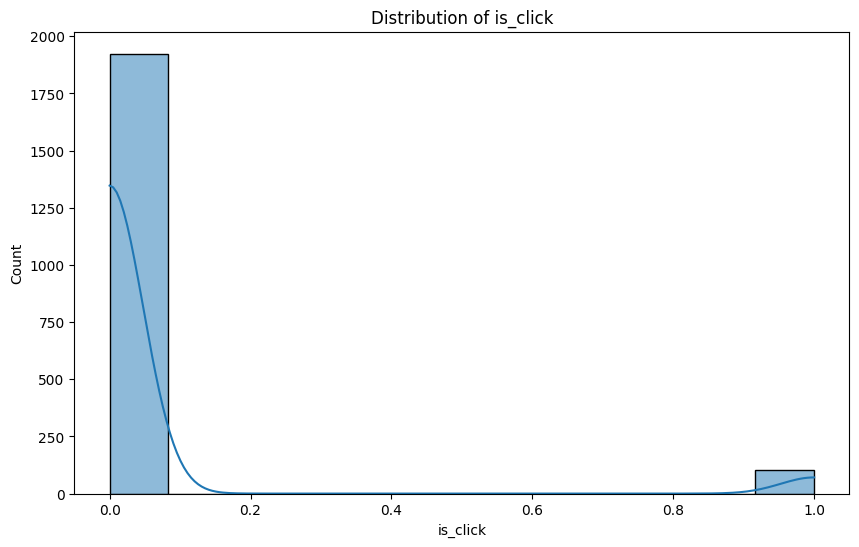

In [13]:
# Data Visualization - Distributions for all columns

palette = sns.color_palette("viridis", 5)
# Iterate over each column
for col in df.columns:
    if df[col].dtype == 'object':
        # Categorical column: create a count plot
        plt.figure(figsize=(10, 6))
        sns.countplot(data=df, x=col, hue=col, palette='Set2', legend=False)  # Set x as hue and disable legend
        plt.title(f"Distribution of {col}")
        plt.xticks(rotation=45)
        plt.show()
    elif df[col].dtype in ['int64', 'float64']:
        # Numeric column: create a histogram
        plt.figure(figsize=(10, 6))
        sns.histplot(data=df, x=col, kde=True)
        plt.title(f"Distribution of {col}")
        plt.show()
    print("")


## 2.3 Find Out Missing Values and Outliers, and Preprocess Data

In [15]:
# Check for missing values
print(df.isnull().sum())

user_id         0
session_id      0
item_id         0
item_price      0
category        0
product_type    0
app_code        0
os_version      0
is_4G           0
is_click        0
dtype: int64


Encoding categorical features

In [20]:
df = pd.get_dummies(df, columns=['os_version'])
df = df.astype(int)
df

,user_id,session_id,item_id,item_price,category,product_type,app_code,is_4G,is_click,os_version_intermediate,os_version_latest,os_version_old
0,87862,268465,44459,4602,11,3040,422,0,0,0,0,1
1,63410,268465,44459,3513,12,6822,467,1,1,0,1,0
2,71748,268465,44459,825,17,1619,259,1,0,1,0,0
3,69209,268465,44459,2355,13,5264,244,1,0,0,1,0
4,62873,268465,44459,1267,17,10239,473,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
2020,8146,284263,5754,2125,13,1762,207,1,0,0,1,0
2021,43622,284263,28621,2874,10,9375,207,1,0,0,1,0
2022,12923,284263,28621,6105,17,2637,3,1,0,0,1,0
2023,26523,418685,36253,3444,7,2037,207,0,0,0,1,0


## Finding Outliers

In [21]:
# Select numerical columns
numerical_columns = df.select_dtypes(include=np.number).columns

# Define a function to detect outliers using IQR method
def detect_outliers_iqr(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    return outliers

# Detect outliers in each numerical column
outliers_dict = {}
for col in numerical_columns:
    outliers_dict[col] = detect_outliers_iqr(df, col)

# Display outliers for each numerical column
for col, outliers in outliers_dict.items():
    print(f"Outliers in column '{col}':")
    print(outliers)
    print("\n")


Outliers in column 'user_id':
Empty DataFrame
Columns: [user_id, session_id, item_id, item_price, category, product_type, app_code, is_4G, is_click, os_version_intermediate, os_version_latest, os_version_old]
Index: []


Outliers in column 'session_id':
Empty DataFrame
Columns: [user_id, session_id, item_id, item_price, category, product_type, app_code, is_4G, is_click, os_version_intermediate, os_version_latest, os_version_old]
Index: []


Outliers in column 'item_id':
Empty DataFrame
Columns: [user_id, session_id, item_id, item_price, category, product_type, app_code, is_4G, is_click, os_version_intermediate, os_version_latest, os_version_old]
Index: []


Outliers in column 'item_price':
      user_id  session_id  item_id  item_price  category  product_type  \
6       64356      295495    40228       18118        16          2537   
7       27329      675965    58320       17856        16          9641   
31      38327     1083196    42540       17222         8         10269   
34   

## 2.4 Split the Data into Train and Test Sets

In [22]:
# Split the data into features (X) and target variable (y)
data = df
X = data.drop(columns=['is_click'])
y = data['is_click']

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)


Balancing the train data by Oversampling

In [28]:
from imblearn.over_sampling import RandomOverSampler

X_train, y_train = RandomOverSampler().fit_resample(X_train, y_train)

In [32]:
y_train.value_counts()

is_click
0    1444
1    1444
Name: count, dtype: int64

## 2.5. Apply appropriate Machine Learning Algorithms and build the model


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# Initialize models
log_reg_model = LogisticRegression()
knn_model = KNeighborsClassifier()
dt_model = DecisionTreeClassifier()
rf_model = RandomForestClassifier()

# Fit models to the training data
log_reg_model.fit(X_train, y_train)
knn_model.fit(X_train, y_train)
dt_model.fit(X_train, y_train)
rf_model.fit(X_train, y_train)

## 2.6. Evaluate the Performance of the Model

In [30]:
from sklearn.metrics import accuracy_score

# Make predictions on the test set for each model
log_reg_pred = log_reg_model.predict(X_test)
knn_pred = knn_model.predict(X_test)
dt_pred = dt_model.predict(X_test)
rf_pred = rf_model.predict(X_test)

# Calculate accuracy for each model
log_reg_accuracy = accuracy_score(y_test, log_reg_pred)
knn_accuracy = accuracy_score(y_test, knn_pred)
dt_accuracy = accuracy_score(y_test, dt_pred)
rf_accuracy = accuracy_score(y_test, rf_pred)

# Display accuracy for each model
print("Accuracy for Logistic Regression:", log_reg_accuracy)
print("Accuracy for K-Nearest Neighbors:", knn_accuracy)
print("Accuracy for Decision Tree:", dt_accuracy)
print("Accuracy for Random Forest:", rf_accuracy)

Accuracy for Logistic Regression: 0.5384615384615384
Accuracy for K-Nearest Neighbors: 0.8323471400394478
Accuracy for Decision Tree: 0.903353057199211
Accuracy for Random Forest: 0.9447731755424064


Metrics for Logistic Regression:
              precision    recall  f1-score   support

           0       0.94      0.55      0.69       480
           1       0.05      0.41      0.09        27

    accuracy                           0.54       507
   macro avg       0.50      0.48      0.39       507
weighted avg       0.89      0.54      0.66       507



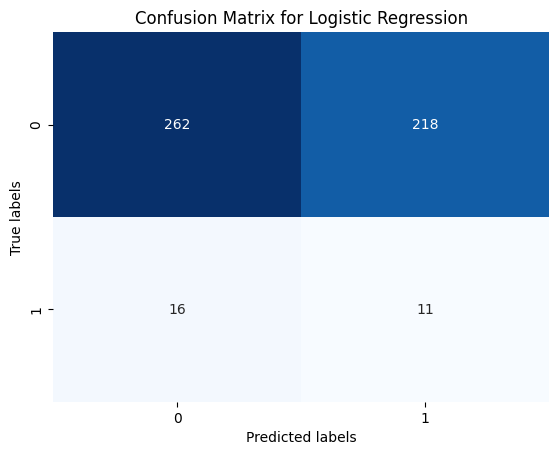



Metrics for K-Nearest Neighbors:
              precision    recall  f1-score   support

           0       0.94      0.88      0.91       480
           1       0.03      0.07      0.04        27

    accuracy                           0.83       507
   macro avg       0.49      0.47      0.48       507
weighted avg       0.90      0.83      0.86       507



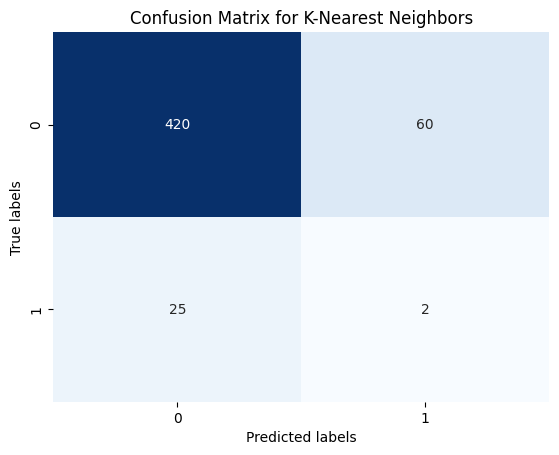



Metrics for Decision Tree:
              precision    recall  f1-score   support

           0       0.94      0.95      0.95       480
           1       0.00      0.00      0.00        27

    accuracy                           0.90       507
   macro avg       0.47      0.48      0.47       507
weighted avg       0.89      0.90      0.90       507



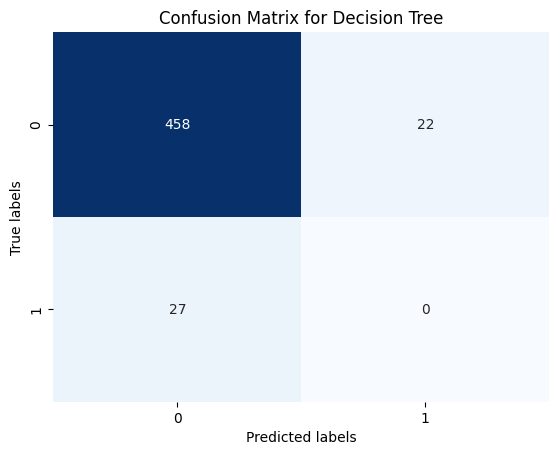



Metrics for Random Forest:
              precision    recall  f1-score   support

           0       0.95      1.00      0.97       480
           1       0.00      0.00      0.00        27

    accuracy                           0.94       507
   macro avg       0.47      0.50      0.49       507
weighted avg       0.90      0.94      0.92       507



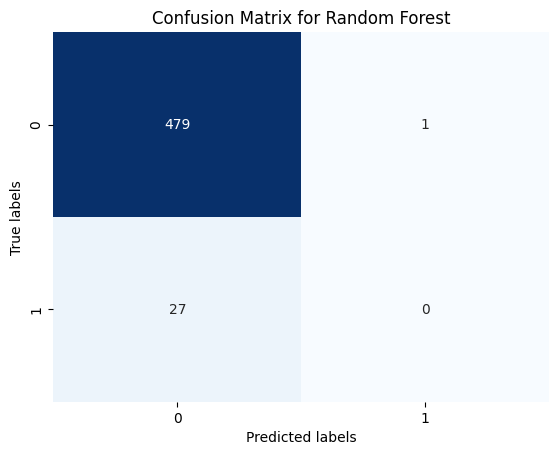

In [31]:
from sklearn.metrics import classification_report, confusion_matrix

# Define a function to display metrics and confusion matrix
def display_metrics(model_name, y_true, y_pred):
    print(f"Metrics for {model_name}:")
    print(classification_report(y_true, y_pred))
    cm = confusion_matrix(y_true, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.xlabel('Predicted labels')
    plt.ylabel('True labels')
    plt.title(f'Confusion Matrix for {model_name}')
    plt.show()
    print("\n")

# Display metrics and confusion matrix for each model
display_metrics("Logistic Regression", y_test, log_reg_pred)
display_metrics("K-Nearest Neighbors", y_test, knn_pred)
display_metrics("Decision Tree", y_test, dt_pred)
display_metrics("Random Forest", y_test, rf_pred)

## 2.7 Verify Feature Importance and Check the Distribution of Prediction Probabilities

                    Feature  Importance
0                   user_id    0.139597
1                session_id    0.143633
2                   item_id    0.131958
3                item_price    0.149749
4                  category    0.078383
5              product_type    0.147289
6                  app_code    0.145288
7                     is_4G    0.018541
8   os_version_intermediate    0.012291
9         os_version_latest    0.017354
10           os_version_old    0.015918


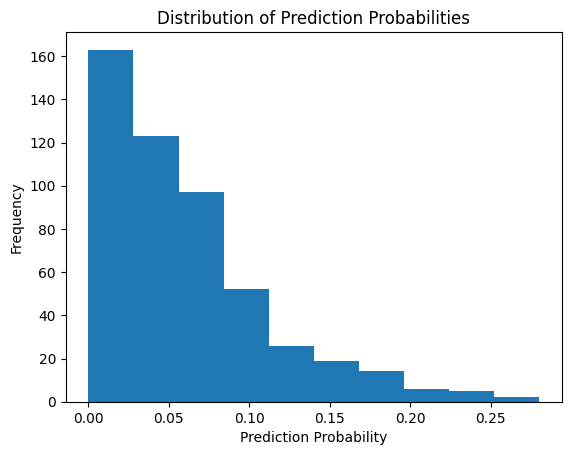

In [27]:
# Feature importance
feature_importance = pd.DataFrame({'Feature': X.columns, 'Importance': rf_model.feature_importances_})
print(feature_importance)

# Distribution of prediction probabilities
y_prob = rf_model.predict_proba(X_test)[:, 1]
plt.hist(y_prob)
plt.xlabel('Prediction Probability')
plt.ylabel('Frequency')
plt.title('Distribution of Prediction Probabilities')
plt.show()